# Regression Analysis

In this notebook we will see how regression analysis can help to understand the data behavior and to predict data values (continuous or discrete).
We will present four different regression models: 
1. Linear regression
2. Multiple linear regression
3. Polynomial regression 
4. Logistic regression

We will introduce the **Ordinary Leasts Squares** and evaluate the modeling results qualitatively by means of **Seaborn visualization tools** and quantitatively by means of the **Statsmodel** toolbox and the **Scikit-learn library**.
We will use a variety of real data sets:
* Longley dataset of US macroeconomic data
* Prediction of the Price of a New Housing Data Market
* Diabetes patients data
* Winning or Losing Football Team

In [1]:
# Settings
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import matplotlib.pylab as plt
%matplotlib inline 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

In [2]:
import numpy as np

## 1. Linear Regression 


### Notation

$x_i$ element of a vector, $\textbf{x}$ column vector, $\textbf{x'}$ (transpose of $\textbf{x}$) row vector, $X$ matrix.

### From Data to Models

All these questions have a common structure: we are asking about one variable $\textbf{y}$ (*response*) that can be expressed as a combination of one or more (independent) variables $\textbf{x}_i$ (commonly called *covariates* or *predictors*).

The role of regression is to build a model (formula) to predict the response from the covariates.

### Linear Model

The simplest model we can think of is the **linear model**, where the response $\textbf{y}$ depends linearly from the covariates $\textbf{x}_i$:

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} $$

The $a_i$ are termed the *parameters* of the model or the coefficients.

This equation can be rewritten in a more compact form as

$$ \textbf{y}  = X \textbf{w}$$

where $$ \textbf{y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right), 
 X = \left( \begin{array}{c} x_{11}  \dots x_{1m} \\ x_{21}  \dots x_{2m}\\ \vdots \\ x_{n1}  \dots x_{nm} \end{array} \right),
 \textbf{w} = \left( \begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right) $$
 
 **Linear regression** is the technique for creating linear models.
 
In the **simple** linear regression, with a single variable, we described the relationship between the predictor and the response with a straight line. 

The model is:
$$ \textbf{y}  =  a_0+ a_1 \textbf{x}_1 $$

The parameter $a_0$ is called the constant term or the *intercept*.

**Example**: Does the insurance price depend on the driving experience?
Given the following information, the monthly auto insurance prices ($\textbf{y}$) and driving experiences in years ($\textbf{x}_{1}$) of a set of n subjects, we can build a linear model to answer this question.
We can also predict the monthly auto insurance price for a driver with 10 years of driving experience.


Let's generate a set of data to illustrate simple linear regression

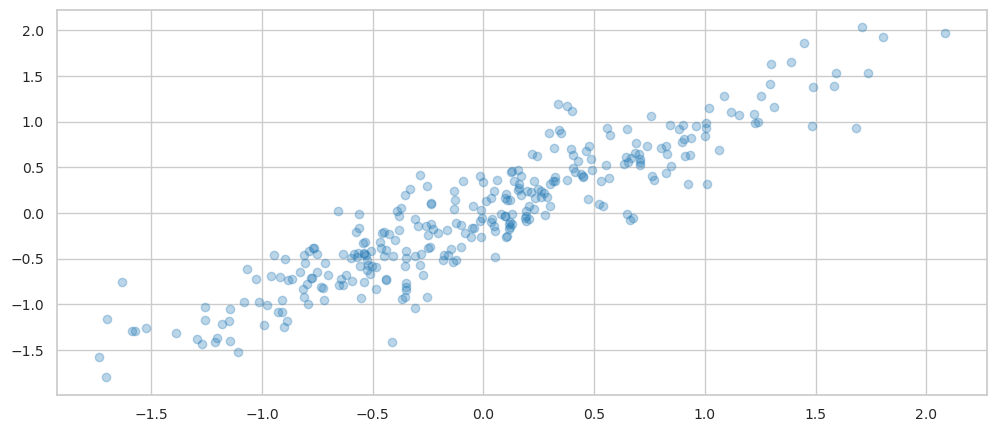

In [3]:
X1 = np.random.randn(300, 2)  # Random floats sampled from a univariate “normal” (Gaussian) distribution
A = np.array([[0.6, .4], [.4, 0.6]])
X2 = np.dot(X1, A)
plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3) # alpha, blending value, between 0 (transparent) and 1 (opaque).
plt.show()

We can create a linear model to explain the data

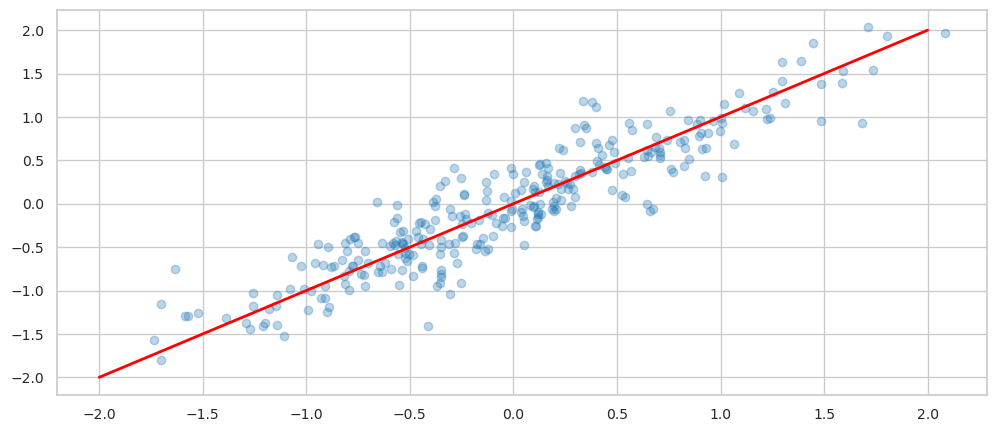

In [4]:
model=[0+1*x for x in np.arange(-2,3)]
plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3);
plt.plot(np.arange(-2,3), model,'r');
plt.show()
# The red line gives the predicted values of this model

But there are other linear models. 


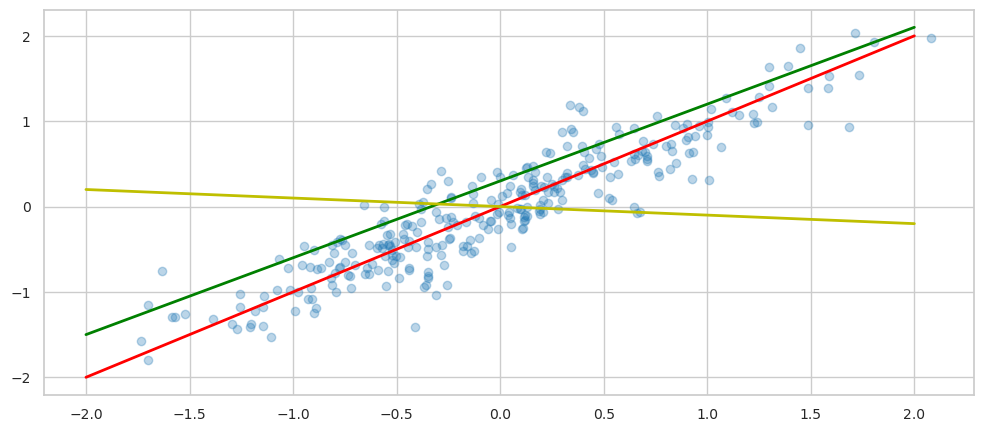

In [5]:
plt.plot(X2[:, 0], X2[:, 1], "o", alpha=0.3);
# We can use several parameters and we do not know which is the best model
model1=[0+1*x for x in np.arange(-2,3)]
model2=[0.3+0.9*x for x in np.arange(-2,3)]
model3=[0-0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1,'r')
plt.plot(np.arange(-2,3), model2,'g')
plt.plot(np.arange(-2,3), model3,'y')
plt.show()

#### Which is the best model for a set of samples? 
Intuitively one wants to minimize the differences between the predicted the values and the actual values...


### Ordinary Least Squares

Given a model such as:

$$\textbf{y} = a_0+a_1 \textbf{x}$$

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the two $a$'s are chosen to minimize the **square of the distance between the predicted values and the actual values**. 

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||a_0 + a_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (a_0+a_1 x_{j} -  y_j )^2,$$ with respect to $a_0, a_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.

The OLS can be implemented in python with <code>Scipy.optimize.fmin</code>:

https://docs.scipy.org/doc/scipy/reference/optimize.html

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


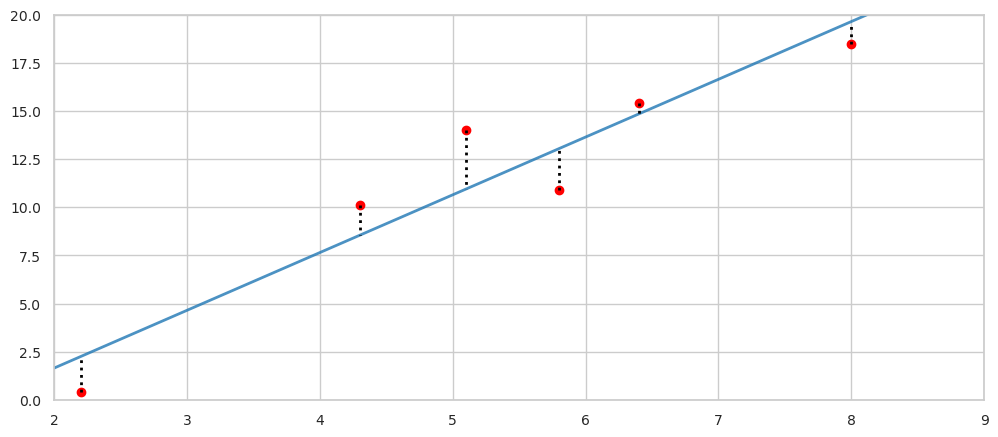

In [6]:
from scipy.optimize import fmin

x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
 
# Minimize the sum of squares using a lambda function

b0,b1 = fmin(lambda theta, x, y: np.sum((y - theta[0] - theta[1]*x) ** 2), [0,1], args=(x,y)); 

plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10], alpha=0.8) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi, xi], [yi, b0+b1*xi], "k:")
plt.xlim(2, 9); plt.ylim(0, 20)
plt.show()

We can minimize other criteria, such as the **sum of absolute differences between the predicted values and the actual values**. 

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77


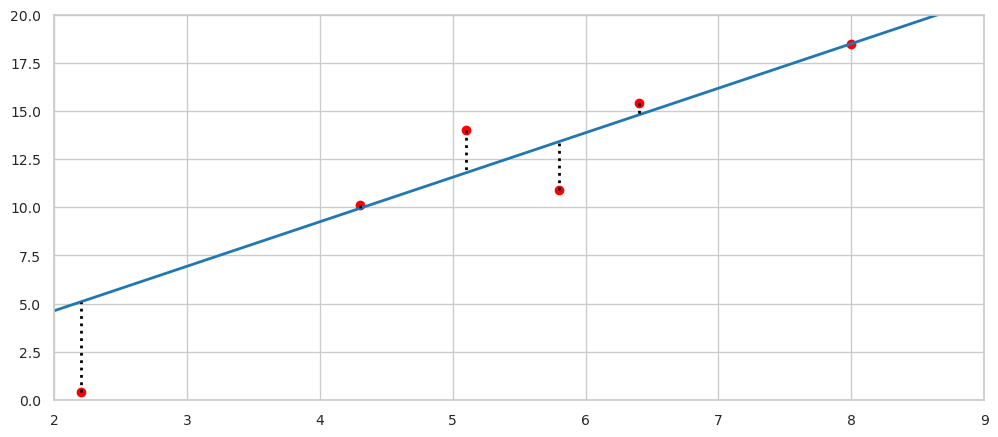

In [7]:
sabs = lambda theta, x, y: np.sum(np.abs(y - theta[0] - theta[1]*x))
b0,b1 = fmin(sabs, [0,1], args=(x,y))   # minimize the sum of absolute differences
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10]) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi, xi], [yi, b0+b1*xi], "k:")
plt.xlim(2, 9); plt.ylim(0, 20)
plt.show()

OLS is a popular approach for several reasons. 

+ For one, it is computationally cheap to calculate the coefficients. 
+ It is also easier to interpret than more sophisticated models, and in situations where the goal is understanding a simple model in detail, rather than estimating the response well, they can provide insight into what the model captures. 
+ Finally, in situations where there is a lot of noise, it may be hard to find the true functional form, so a constrained model can perform quite well compared to a complex model which is more affected by noise.

The resulting model is represented as follows:

$$\hat{\textbf{y}} = \hat{a}_0+\hat{a}_1 \textbf{x}$$

Here the hats on the variables represent the fact that they are estimated from the data we have available.

### Linear Regression Visualization: Seaborn

Seaborn is a Python data visualization library based on matplotlib that integrates closely with pandas data structures. It provides a high-level interface for drawing attractive and informative statistical graphics:
https://seaborn.pydata.org

The ``lmplot()`` function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datasets. Input data must be in a Pandas ``DataFrame``. To plot, provide the predictor and response variable names along with the dataset.
https://seaborn.pydata.org/generated/seaborn.lmplot.html

### Linear regression predictions: statsmodels

The ``statsmodels`` package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the OLS module:
https://www.statsmodels.org/stable/index.html

We can perform the regression of the predictor on the response, using the ``sm.OLS`` class and its initialization ``OLS(y, X)`` method. This method takes as an input two array-like objects: $X$ and $\textbf{y}$. In general, $X$ will either be a numpy array or a pandas data frame with shape ``(n, p)`` where $n$ is the number of data points and $p$ is the number of predictors. $\textbf{y}$ is either a one-dimensional numpy array or a pandas series of length $n$.

### DATA SET 1:  Macroeconomic dataset

Let's load the Longley dataset of US macroeconomic data from the R datasets website.
https://www.statsmodels.org/stable/datasets/generated/longley.html

In [8]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
rownames,,,,,,,
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


Macroeconomic data from 1947 to 1962.

We will use the variable Total Derived Employment ('Employed') as our response $\textbf{y}$ and Gross National Product ('GNP') as our predictor $\textbf{x}$.


/home/vic_263/miniconda3/envs/work/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


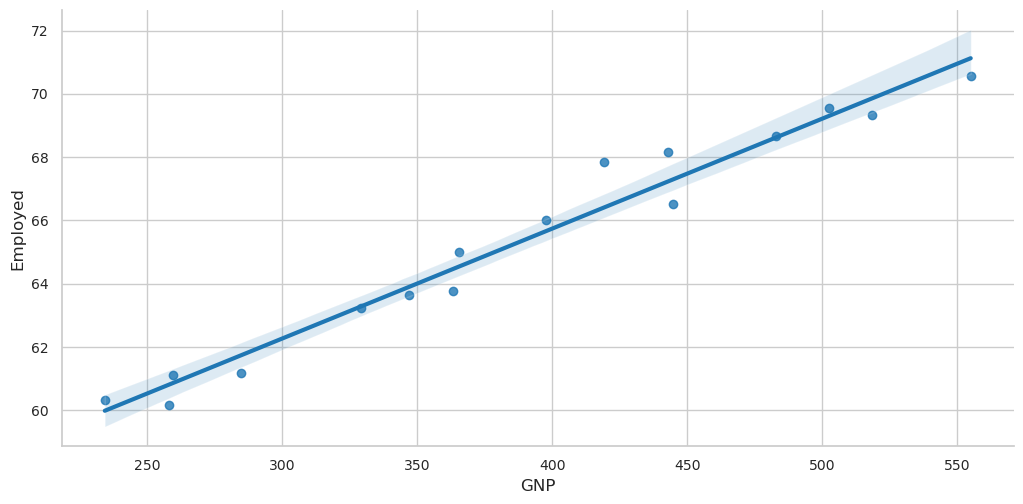

In [11]:
sns.lmplot(x = "GNP", y = "Employed", data = df, height=5.2, aspect=2)

This plot has two main components. 

+ The first is a scatterplot, showing the observed datapoints. 
+ The second is a regression line, showing the estimated linear model relating the two variables. Because the regression line is only an estimate, it is plotted with a 95% confidence band to give an impression of the certainty in the model.

### Exercise
Explore **graphically** the linear relations of different variables. Are there other highly collinear variables?


/home/vic_263/miniconda3/envs/work/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


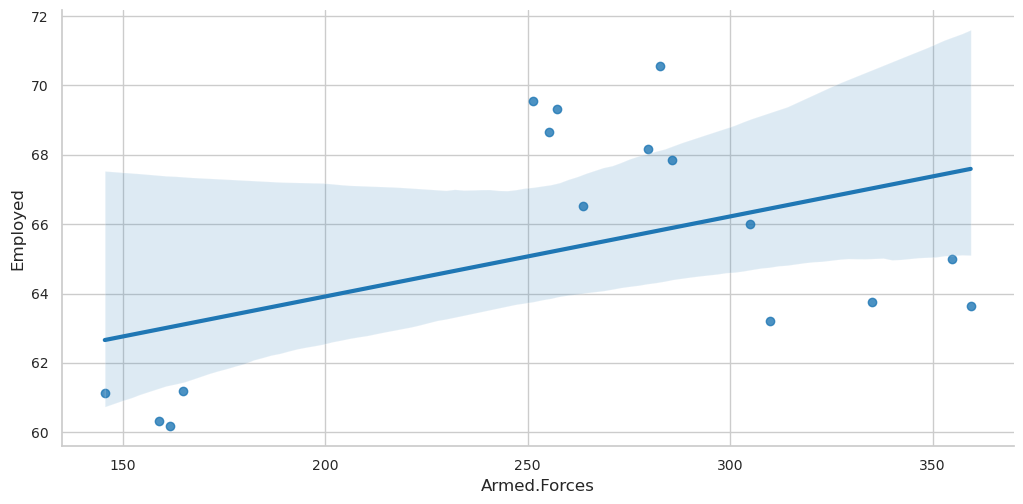

In [13]:
#your solution here
sns.lmplot(x = "Armed.Forces", y = "Employed", data = df, height=5.2, aspect=2)

Let's explore the relations of multiple variables using a **scatter plot** of Pandas. The scatter plot is a grid of plots of multiple variables one against the other, showing the relationship of each variable to the others.

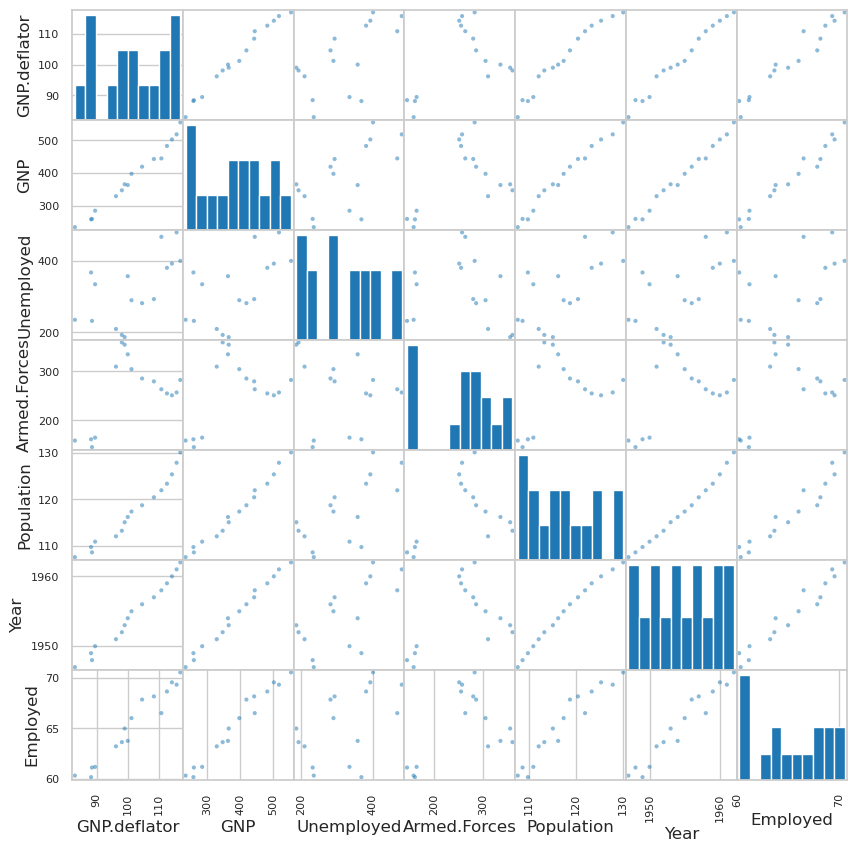

In [14]:
pd.plotting.scatter_matrix(df, figsize=(10.0,10.0));  
# Interesting options: 1) hist_kwds={'bins':30}, 2) diagonal='kde', 3) marker='+'

Let's build a linear model with the ``statsmodels`` package and evaluate **quantitatively** the predictions

We take the single response variable y ('Employed') and store it separately. We also add a constant term to our predictor X ('GNP') so that we fit the intercept of our linear model.

In [15]:
import statsmodels.api as sm
y = df.Employed  # response
X = df.GNP  # predictor
# Note: no constant is added by the model unless you are using formulas (!!)
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

,const,GNP
rownames,,
1947,1.0,234.289
1948,1.0,259.426
1949,1.0,258.054
1950,1.0,284.599
1951,1.0,328.975


We can perform the regression of the predictor on the response, using the ``sm.OLS`` class and its initialization ``OLS(y, X)`` method. 

This method takes as an input two array-like objects: $X$ and $\textbf{y}$. In general, $X$ will either be a numpy array or a pandas data frame with shape ``(n, p)`` where $n$ is the number of data points and $p$ is the number of predictors. $\textbf{y}$ is either a one-dimensional numpy array or a pandas series of length $n$.

In [16]:
est=sm.OLS(y, X)

We then need to fit the model by calling the OLS object’s fit() method.

In [17]:
est = est.fit()

We can obtain the predicted values:

In [18]:
est.predict()

array([59.98567007, 60.8592385 , 60.81155835, 61.734058  , 63.27622581,
       63.90260117, 64.54155685, 64.46256489, 65.65654946, 66.41105653,
       67.2308284 , 67.29258322, 68.61866127, 69.31012767, 69.8512904 ,
       71.1274294 ])

We can obtain the estimated parameters, and the goodness of fit (e.g. MSE and R^2): 

In [19]:
print(est.params)
print('MSE: ',est.mse_total)
print('R_squared: ',est.rsquared)

const    51.843590
GNP       0.034752
dtype: float64
MSE:  12.333921733333334
R_squared:  0.9673737718541235


Let's plot the linear model and a summary of regression results: 

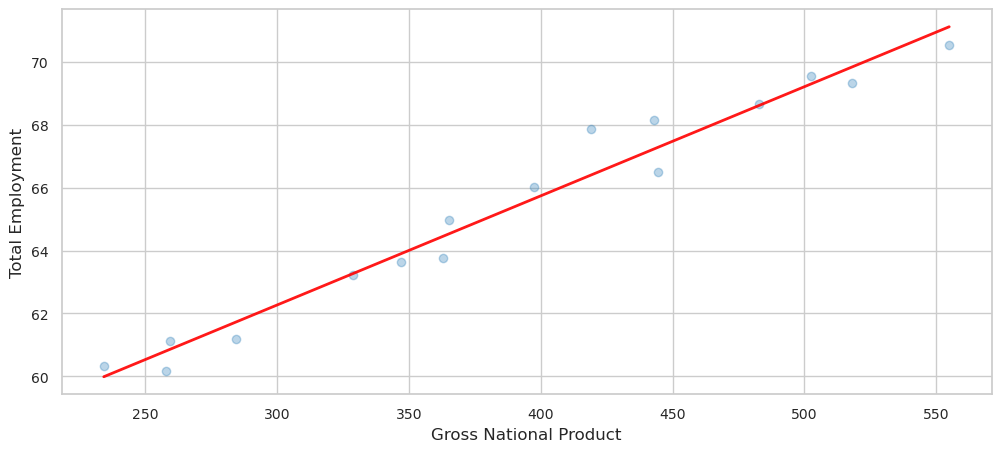

In [20]:
import numpy as np
# We pick 100 hundred points equally spaced from the min to the max 
X_prime = np.linspace(df.GNP.min(), df.GNP.max(), 100)
X_prime = sm.add_constant(X_prime) # add constant as we did before 
# Now we calculate the predicted values 
y_hat = est.predict(X_prime) 
plt.scatter(df.GNP, y, alpha=0.3) 
# Plot the raw data 
plt.xlabel("Gross National Product") 
plt.ylabel("Total Employment") 
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) # Add the regression line, colored in red 

In [21]:
est.summary()

/home/vic_263/miniconda3/envs/work/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           8.36e-12
Time:                        20:00:11   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What happens if we force the linear regression to pass through (0,0)?

In [22]:
y = df.Employed  # response
X = df.GNP  # predictor
est2=sm.OLS(y, X).fit()
print(est2.params)
print('MSE: ',est2.mse_total)
print('R_squared: ',est2.rsquared)

GNP    0.160712
dtype: float64
MSE:  4277.873540625
R_squared:  0.9634443626004952


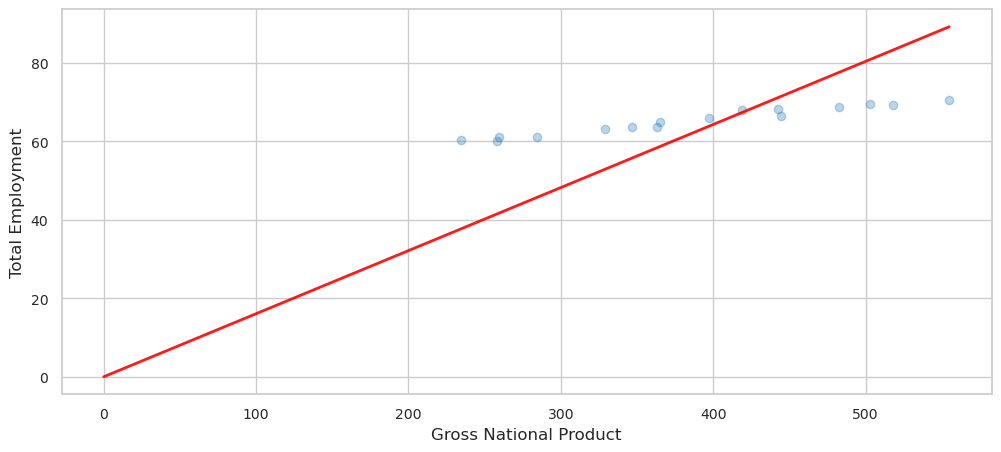

In [23]:
import numpy as np
# We pick 100 hundred points equally spaced from the min to the max 
X_prime2 = np.linspace(0, df.GNP.max(), 100)
# Now we calculate the predicted values 
y_hat = est2.predict(X_prime2) 
plt.scatter(df.GNP, y, alpha=0.3) 
# Plot the raw data 
plt.xlabel("Gross National Product") 
plt.ylabel("Total Employment") 
plt.plot(X_prime2, y_hat, 'r', alpha=0.9) # Add the regression line, colored in red 
#plt.axis('equal')

### Exercise

Look at the coefficient of determinarion (R^2) values obtained for the two approaches. Is there something wrong? Let's double check by computing the R^2 ourselves

The coefficient $R^2$ is defined as $(1 - \textbf{u}/\textbf{v})$, where:
+ $\textbf{u}$ is the residual sum of squares $\sum (\textbf{y} - \hat{\textbf{y}})^2$, and
+ $\textbf{v}$ is the regression sum of squares $\sum (\textbf{y} - \bar{\textbf{y}})^2$, where $\bar{\textbf{y}}$ is the mean.


The best possible score for $R^2$ is 1.0: lower values are worse.

In [24]:
#your solution here

Documentation for statsmodel rsquared:
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.rsquared.html

We can also use "formulas", a convenience interface for specifying models using formula strings and DataFrames. In this case the intercept is included by default:

In [25]:
import statsmodels.formula.api as sm1

results_formula = sm1.ols(formula='df.Employed ~ df.GNP', data=df).fit()
print(results_formula.params)
print('MSE: ',results_formula.mse_total)
print('R_squared: ',results_formula.rsquared)

Intercept    51.843590
df.GNP        0.034752
dtype: float64
MSE:  12.333921733333334
R_squared:  0.9673737718541235


In [26]:
results_without_intercept = sm1.ols(formula='df.Employed ~ df.GNP - 1', data=df).fit()
print(results_without_intercept.params)
print('MSE: ',results_without_intercept.mse_total)
print('R_squared: ',results_without_intercept.rsquared)

df.GNP    0.160712
dtype: float64
MSE:  4277.873540625
R_squared:  0.9634443626004952


### Exercise
Develop a linear model to predict 'Unemployed' based on 'GNP'. Provide the parameters of the model and goodness of fit. 

In [27]:
## your solution here

In [28]:
## my solution here
y = df.Unemployed  # response
X = df.GNP  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
est=sm.OLS(y, X).fit()
y_hat = est.predict()
u = ((y-y_hat)**2).sum()
v = ((y-y.mean())**2).sum()
R2=1-u/v
print(est.params)
print('MSE: ',est.mse_total)
print('R_squared: ',est.rsquared)
print('R_squared (double check): ',R2)

const    99.080703
GNP       0.568098
dtype: float64
MSE:  8732.23429166667
R_squared:  0.3651312834762118
R_squared (double check):  0.3651312834762118


Plot the original data and the predictions in a single graph 

In [29]:
#your solution here

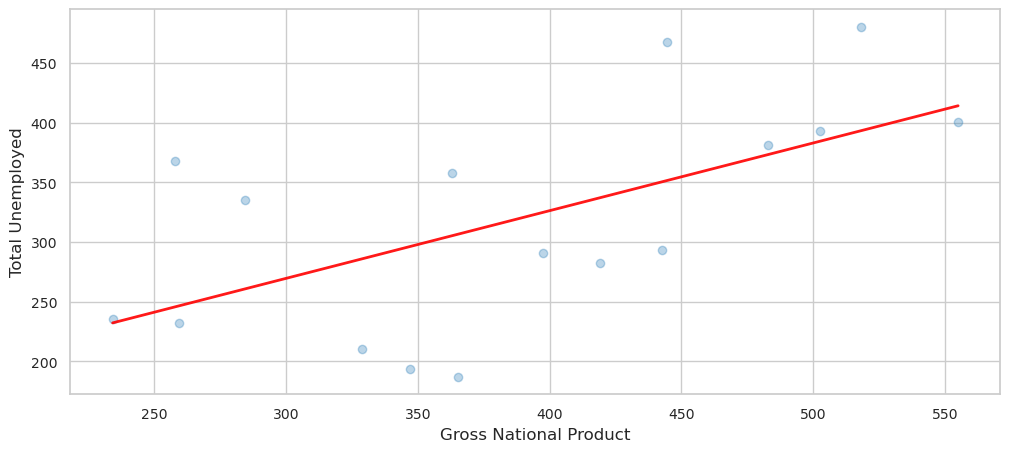

In [30]:
#my solution here
import numpy as np
# We pick 100 hundred points equally spaced from the min to the max 
X_prime = np.linspace(X.GNP.min(), X.GNP.max(), 100)
X_prime = sm.add_constant(X_prime) # add constant as we did before 
# Now we calculate the predicted values 
y_hat = est.predict(X_prime) 
plt.scatter(X.GNP, y, alpha=0.3) 
# Plot the raw data 
plt.xlabel("Gross National Product") 
plt.ylabel("Total Unemployed") 
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) # Add the regression line, colored in red 

## 2. Multiple Regression and Polynomial Regression
In a linear regression with a single variable we describe the relationship between the predictor and the response with a straight line. This case is called *simple* linear regression. In the case of *multiple* linear regression we extend this idea by fitting a p-dimensional hyperplane to our p predictors.

$$ \textbf{y} = a_1 \textbf{x}_1 + \dots + a_p \textbf{x}_p = X \textbf{w} $$


Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

A very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. We can for example represent a curved relationship between our variables by introducing a cubic model:

$$y_i \approx a_0 + a_1 x_i + a_2 x_i^2 + a_3 x_i^3$$

The higher the order of the polynomial the more "wigglier" functions you can fit. 

Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

### Exercise

Following with the previous example using Macroeconomic data, try to use higher order models to fit GNP with Employed and Unemployed using <code>seaborn.lmplot</code> and the "order" parameter 

In [31]:
# Your code here

In [32]:
# My code here
sns.lmplot("GNP", "Employed", df, order=3, height=5.2,aspect=2);

TypeError: lmplot() takes from 0 to 1 positional arguments but 3 positional arguments (and 3 keyword-only arguments) were given

In [33]:
sns.lmplot("GNP", "Unemployed", df, order=3, height=5.2,aspect=2);

TypeError: lmplot() takes from 0 to 1 positional arguments but 3 positional arguments (and 3 keyword-only arguments) were given

### DATA SET 2: Housing Data

To illustrate polynomial regression we will consider the Boston housing dataset. It provides records measurements of 13 attributes of housing markets around Boston, as well as the median price in $1000's. We want to predict the price of a market given a set of attributes.


To start with we load and visualize the data.

In [34]:
from sklearn import datasets
boston = datasets.load_boston()
X_boston,y_boston = boston.data, boston.target
print('Shape of data:', X_boston.shape, y_boston.shape)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
print('keys:', boston.keys())
print('feature names:',boston.feature_names)
print(boston.DESCR)

In [ ]:
# Histogram of prices:
plt.hist(y_boston) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

We first consider the task of predicting median house values in the Boston area ``medv`` using as the predictor one of the attributes, for instance, ``lstat``, defined as the "proportion of lower status of the population".
Seaborn visualization can be used to show this linear relationships easily:

In [ ]:
# Visualization of the relations between price and LSTAT
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['price'] = boston.target
sns.lmplot("price", "LSTAT", df_boston,height=5.2,aspect=2);


We can see that the relationship between ``medv`` and ``lstat`` is non-linear: the straight line is a poor fit; a better fit can be obtained by including higher order terms.

We can visualize the fit of higher order models by changing the "order" parameter: 

In [ ]:
sns.lmplot("price", "LSTAT", df_boston, order=2,height=5.2,aspect=2);


In [ ]:
sns.lmplot("price", "LSTAT", df_boston, order=3,height=5.2,aspect=2);

We can look at other potential predictors such as the average number of rooms per house ``RM``:

In [ ]:
# Visualization of the relations between price and RM
sns.lmplot("price", "RM", df_boston,height=5.2,aspect=2);

### Exercise
Plot the scatter plot of 'RM','AGE','LSTAT' and 'price':

In [ ]:
#your solution here

In [ ]:
#my solution here
print(boston.feature_names)
indexes=[5,6,12]
print(boston.feature_names[indexes])

In [ ]:
indexes=[5,6,12]
df2 = pd.DataFrame(boston.data[:,indexes], columns=boston.feature_names[indexes])
df2['price'] = boston.target  #add the target variable as well: price
pd.plotting.scatter_matrix(df2, figsize=(10.0,10.0));  


### Multiple Linear Regression Predictions: Scikit-learn

Let's make predictions using Scikit-learn. 

Scikit-learn is a library that provides a variety of both supervised and unsupervised machine learning techniques.

Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. 

The <code>Estimator.fit</code> method sets the state of the estimator based on the *training data*. Usually, the data is comprised of a two-dimensional numpy array $X$ of shape <code>(n_samples, n_predictors)</code> that holds the so-called feature matrix and a one-dimensional numpy array $\textbf{y}$ that holds the responses. 

Some estimators allow the user to control the fitting behavior. For example, the <code>sklearn.linear_model.LinearRegression</code> estimator allows the user to specify whether or not to fit an intercept term (by default it is considered). This is done by setting the corresponding constructor arguments of the estimator object.


During the fitting process, the state of the estimator is stored in instance attributes that have a trailing underscore (``'_'``). For example, the coefficients of a ``LinearRegression`` estimator are stored in the attribute ``coef_``:

In [35]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
clf = LinearRegression(fit_intercept=False) 
clf.fit ([[0, 1], [1, 1], [2, 1]], [0, 1, 2])  # Perform the fitting
clf.coef_

array([1.00000000e+00, 1.98602732e-16])

Estimators that can generate predictions provide a ``Estimator.predict`` method. In the case of regression, ``Estimator.predict`` will return the predicted regression values,  𝐲̂


We can evaluate the model fitting by computing the mean squared error ($MSE$) and the coefficient of determination ($R^2$) of the model.


We will split the data into training set and test set:

In [36]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(df2['LSTAT'])
X_train, X_test, y_train, y_test = train_test_split(X, y_boston, test_size=0.3, random_state=0)
print('Train and test sizes', X_train.shape, X_test.shape)
regr_boston = LinearRegression()
regr_boston.fit(X_train, y_train) 
print('Coeff and intercept:', regr_boston.coef_, regr_boston.intercept_)
# Score is R^2: Best possible score is 1.0, lower values are worse.
print('Score:', regr_boston.score(X_test, y_test)) 
print('Training MSE: ', np.mean((regr_boston.predict(X_train) - y_train)**2))
print('Test MSE: ', np.mean((regr_boston.predict(X_test) - y_test)**2))

NameError: name 'df2' is not defined

### Exercise

Check if the goodness of fit increases if we use LSTAT and RM variables as predictors

In [ ]:
#your solution here

In [ ]:
#my solution here
X = pd.DataFrame(np.c_[df2['LSTAT'], df2['RM']], columns = ['LSTAT','RM'])

X_train, X_test, y_train, y_test = train_test_split(X, y_boston, test_size=0.3, random_state=0)
print('Train and test sizes', X_train.shape, X_test.shape)
regr_boston = LinearRegression()
regr_boston.fit(X_train, y_train) 
print('Coeff and intercept:', regr_boston.coef_, regr_boston.intercept_)
# Score is R^2: Best possible score is 1.0, lower values are worse.
print('Score:', regr_boston.score(X_test, y_test)) 
print('Training MSE: ', np.mean((regr_boston.predict(X_train) - y_train)**2))
print('Test MSE: ', np.mean((regr_boston.predict(X_test) - y_test)**2))


Do we obtain best estimates when using all available variables as inputs? 

In [ ]:
#your solution here

In [ ]:
#my solution here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.4, random_state=0)
print('Train and test sizes', X_train.shape, X_test.shape)
regr_boston = LinearRegression()
regr_boston.fit(X_train, y_train) 
print('Coeff and intercept:', regr_boston.coef_, regr_boston.intercept_)
# Score is R^2: Best possible score is 1.0, lower values are worse.
print('Score:', regr_boston.score(X_test, y_test)) 
print('Training MSE: ', np.mean((regr_boston.predict(X_train) - y_train)**2))
print('Test MSE: ', np.mean((regr_boston.predict(X_test) - y_test)**2))

### Transformer
There is a special type of ``Estimator`` called ``Transformer`` which transforms the input data -- e.g. selects a subset of the features or extracts new features based on the original ones.

One transformer that we will use here is ``sklearn.preprocessing.StandardScaler``. This transformer centers each predictor in ``X`` to have zero mean and unit variance:

Sometimes Standarization is useful:

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create the transformer StandardScaler for data and target
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train.reshape(-1,1))

print("Before transformation:")
print(np.max(y_train), np.min(y_train), np.mean(y_train)) 

# Normalization of train and test data using mean and variance of the training
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train.reshape(-1,1))
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test.reshape(-1,1))

print("After transformation:")
print(np.max(y_train), np.min(y_train), np.mean(y_train))

### Exercise
Use the scaled data to obtain a linear model for the Boston dataset. Do we get a better fit? 

In [ ]:
#your solution here

### DATA SET 3: Diabetes

To illustrate linear multiple linear regression we will use the diabetes dataset (from scikit-learn) consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year:

https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X,y = diabetes.data, diabetes.target
print(X.shape, y.shape)

In [ ]:
df3 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
pd.plotting.scatter_matrix(df3, figsize=(10.0,10.0)); 

Let's use column 2 to perform a regression:

In [ ]:
X2 = X[:,2:3] #we need a matrix
X2.shape

Divide in training and test sets and evaluate the prediction (sklearn) with a simple and a multiple regression model.

In [ ]:
# Remove any possible correlation present in the given input samples
from sklearn.utils import shuffle
X2,y = shuffle(X2,y,random_state=1)

In [ ]:
# Now we can sequentially split the data into training set and test
train_size = 250
X_train = X2[:train_size]
X_test = X2[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]
print(X_train.shape, X_test.shape)

Visualize the data using scatter plot (plt.scatter)

In [ ]:
# Data visualization
plt.scatter(X_train, y_train, color='red', alpha=0.5)
plt.scatter(X_test, y_test, color='blue', alpha=0.5)

In [ ]:
from sklearn import linear_model
regr1 = LinearRegression()
regr1.fit(X_train, y_train) 
print(regr1.coef_, regr1.intercept_)
print('Score:', regr1.score(X_test, y_test))

# Calculate the Mean Squared Error on the test set
print('Training MSE: ', np.mean((regr1.predict(X_train) - y_train)**2))
print('Test MSE: ', np.mean((regr1.predict(X_test) - y_test)**2))

In [ ]:
# Visualize the linear model prediction
plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, regr1.predict(X_train), color='red')
plt.xlabel('Data')
plt.ylabel('Target')

plt.scatter(X_test, y_test, color='red'),
plt.plot(X_test, regr1.predict(X_test), color='blue')
plt.xlabel('Data')
plt.ylabel('Target')

### Exercise

Divide in training and testing sets and evaluate the prediction using a multiple regression model with the 10 variables.

In [ ]:
#your code here

What can we interpret from the regression coefficients? examine their significance using statsmodels

In [ ]:
#your code here

## 4. Logistic Regresion 

**Logistic regression** or logit regression is a type of probabilistic statistical **classification model**. It is also used to predict a binary response from a binary predictor, used for predicting the outcome of a categorical dependent variable (i.e., a class label) based on one or more predictor variables (features). 


The logistic function is:

$$ f(x) = \frac{1}{1+e^{- \lambda x}}$$

The logistic function is useful because it can take an input with any value from negative infinity to positive infinity, whereas the output  is confined to values between 0 and 1 and hence is interpretable as a probability.

In [ ]:
def logist(x,l):
    return 1/(1+np.exp(-l*x))

x = np.linspace(-10,10) # 50 points equally spaced from -10 to 10
t = logist(x,0.5)
y = logist(x,1)
z = logist(x,3)
plt.plot(x,t, label='lambda=0.5')
plt.plot(x,y, label='lambda=1')
plt.plot(x,z, label='lambda=3')
plt.legend(loc='upper left')
plt.show()

Let's build a logistic regresssion using the Scikit-learn library:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

The solvers implemented in the class LogisticRegression are “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”. The default is “lbfgs”, which is a reasonably good choice for most cases without a really large dataset. Detailed info here: https://scikit-learn.org/stable/modules/linear_model.html

In [ ]:
from sklearn import linear_model

xmin, xmax = -10, 10
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples) # Creates 100 random numbers from a normal distribution.
y = (X > 0).astype(np.float) 
X = X[:, np.newaxis] #convert vector to matrix

X_test = np.linspace(-10, 10, 300)
X_test[:, np.newaxis]

# Linear Regression:
ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, color='blue', linewidth=2, label='linear model')

# Logistic Regression:
clf = linear_model.LogisticRegression(C=10,solver='lbfgs')
# C: default = 1.0, intuitively the lambda of the logistic function
#'lbfgs': Limited-memory Broyden–Fletcher–Goldfarb–Shannon
clf.fit(X, y)

def lr_model(x):
    return 1 / (1 + np.exp(-x))

loss = lr_model(X_test * clf.coef_ + clf.intercept_).ravel() # in column array
plt.plot(X_test, loss, color='red', linewidth=2, label='log reg')
#plt.plot(X_test, clf.predict(X_test[:, np.newaxis]).ravel(), color='green', linewidth=2, label='y_hat')
plt.scatter(X_test,clf.predict(X_test[:, np.newaxis]).ravel(),color='green',label='y_hat')
plt.axhline(0.5, color='grey') # Plot horizontal axis in 0.5

plt.scatter(X, y, color='black')

plt.legend(loc='lower right')
plt.ylabel('y')
plt.xlabel('x')

plt.ylim(-1, 2)
plt.xlim(-4, 4)




## DATA SET 4: Winning or Losing Football Team

We want to predict victory or defeat in a football match when we are given the number of goals a team scores.
To do this we consider the set of results of the football matches from the Spanish league and we build a classification model with it. <p>

We follow the steps:

+ Read this file in a pandas DataFrame: http://www.football-data.co.uk/mmz4281/1213/SP1.csv
+ Select these columns in a new DataFrame: 'HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR'. (FTHG: Home team goals, FTAG: Away team goals, FTR: H=Home Win, D=Draw, A=Away Win)
+ Visualize a scatter plot of FTHG versus FTAG.
+ Built a $X$ 1-d predictor with all scores and a $y$ binary variable indicating win or loss.
+ Compute and visualize a logistic regression. 
+ Which is the cut value?


In [ ]:
import pylab as pl

# Season 2012/2013
file = 'files/SP1.csv' # file = 'http://www.football-data.co.uk/mmz4281/1213/SP1.csv'
footballData = pd.read_csv(file)
s = footballData[['HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR']]

In [ ]:
s.head() # (H=Home Win, D=Draw, A=Away Win)

Can we predict if we have a win or loss if we are given a score?

In [ ]:
# Visualization with scatter the number of goals"
pl.scatter(s.FTHG, s.FTAG, s=100, alpha=0.03) 
plt.xlabel('Home team goals (FTHG)')
plt.ylabel('Away team goals (FTAG)')

In [ ]:
# Create two extra columns containing 'W' the number of goals of the winner and 'L' the number of goals of the losser"
def my_f1(row):
    return max(row['FTHG'], row['FTAG'])

def my_f2(row):
    return min(row['FTHG'], row['FTAG'])

# Add 2 new columns to the panda:
s['W'] = s.apply(my_f1, axis=1)
s['L'] = s.apply(my_f2, axis=1)

In [ ]:
s.info()
s.head()

In [ ]:
# Create the data and target
import numpy as np
x1 = s['W'].values
y1 = np.ones(len(x1), dtype=np.int)
x2 = s['L'].values
y2 = np.zeros(len(x2), dtype=np.int)

x = np.concatenate([x1,x2])
x = x[:, np.newaxis]
y = np.concatenate([y1,y2])

In [ ]:
x = np.concatenate([x1,x2])
x = x[:, np.newaxis]
x.shape

In [ ]:
# Plot the data 
plt.scatter(x,y, s=100, alpha=0.03)
plt.xlabel('Number of goals')
plt.ylabel('Win (1) or loss (0)')
plt.show()

### Exercise
Compute and visualize the logistic regression. What is the cut value?

In [ ]:
#your solution here